In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('data/kc_house_data.csv')

In [5]:
grade_num = []
for index, row in df.iterrows():
    grade_num.append(int((str(row['grade'])[0:2])))
df['grade_num'] = grade_num
df.drop('grade', axis = 1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_num
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,7
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,7
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,6
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,7
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,8
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,8
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,7
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,8


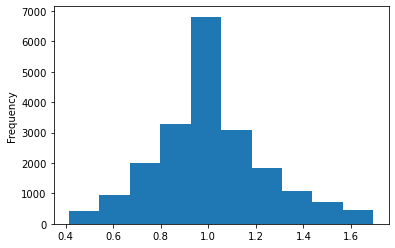

In [6]:
df.sqft_living.describe()
df['sqft_living_ratio'] = df['sqft_living'] / df['sqft_living15']
df.sqft_living_ratio.describe()


df['sqft_living_ratio'] = df.sqft_living / df.sqft_living15
df['sqft_living_ratio'] = df['sqft_living_ratio'].loc[(np.abs(stats.zscore(df.sqft_living_ratio)) < 2)]
df = df.dropna(subset = ['sqft_living_ratio'])
df.sqft_living_ratio.plot.hist();

count    20386.000000
mean         1.042518
std          0.312278
min          0.054972
25%          0.933333
50%          1.000000
75%          1.077654
max          3.275862
Name: sqft_lot_ratio, dtype: float64

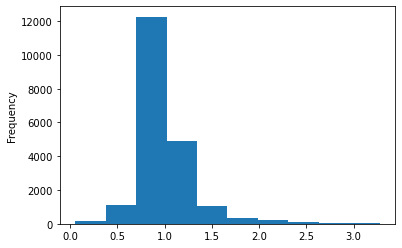

In [7]:
df.sqft_lot15.describe()
df['sqft_lot_ratio'] = df['sqft_lot'] / df['sqft_lot15']
df.sqft_lot_ratio.describe()

df['sqft_lot_ratio'] = df.sqft_lot / df.sqft_lot15
df['sqft_lot_ratio'] = df['sqft_lot_ratio'].loc[(np.abs(stats.zscore(df.sqft_lot_ratio)) < 2)]
df = df.dropna(subset = ['sqft_lot_ratio'])
df.sqft_lot_ratio.plot.hist();
df.sqft_lot_ratio.describe()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20386 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 20386 non-null  int64  
 1   date               20386 non-null  object 
 2   price              20386 non-null  float64
 3   bedrooms           20386 non-null  int64  
 4   bathrooms          20386 non-null  float64
 5   sqft_living        20386 non-null  int64  
 6   sqft_lot           20386 non-null  int64  
 7   floors             20386 non-null  float64
 8   waterfront         18140 non-null  object 
 9   view               20328 non-null  object 
 10  condition          20386 non-null  object 
 11  grade              20386 non-null  object 
 12  sqft_above         20386 non-null  int64  
 13  sqft_basement      20386 non-null  object 
 14  yr_built           20386 non-null  int64  
 15  yr_renovated       16783 non-null  float64
 16  zipcode            203

In [9]:
from statsmodels.formula.api import ols
X = df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','sqft_living15', 'sqft_lot15', 'grade_num']]
y = df.price

In [10]:
formula = 'price~ bedrooms + bathrooms + sqft_living_ratio + sqft_lot_ratio + C(waterfront) + floors + C(zipcode) + grade_num'
regression = ols(formula, data = df).fit().summary()
regression

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     684.7
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:21:15   Log-Likelihood:            -2.4403e+05
No. Observations:               18140   AIC:                         4.882e+05
Df Residuals:                   18063   BIC:                         4.888e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -9.236e+05   1.48e+04    -62.399      0.000   -9.53e+05   -8.95e+05
C(waterfront)[T.YES]  8.794e+05   1.54e+04     57.098      0.000    8.49e+05     9.1e+05
C(zipcode)[T.98002]   4.848e+04   1.61e+04      3.006      0.003    1.69e+04    8.01e+04
C(zipcode)[T.98003]  -2.101e+04   1.43e+04     -1.470      0.142    -4.9e+04    7013.676
C(zipcode)[T.98004]   7.939e+05   1.45e+04     54.854      0.000    7.66e+05    8.22e+05
C(zipcode)[T.98005]   3.285e+05   1.67e+04     19.626      0.000    2.96e+05    3.61e+05
C(zipcode)[T.98006]   3.392e+05   1.27e+04     26.632      0.000    3.14e+05    3.64e+05
C(zipcode)[T.98007]   2.382e+05   1.81e+04     13.145      0.000    2.03e+05    2.74e+05
C(zipcode)[T.98008]   2.623e+05   1.44e+04     18.204      0.000    2.34e+05     2.9e+05
C(zipcode)[T.98010]   1.358e+05   2.13e+04      6.370      0.000     9.4e+04    1.78e+05
C(zipcode)[T.98011]   1.352e+05   1.61e+04      8.404      0.000    1.04e+05    1.67e+05
C(zipcode)[T.98014]   1.595e+05   1.97e+04      8.111      0.000    1.21e+05    1.98e+05
C(zipcode)[T.98019]   1.194e+05   1.64e+04      7.285      0.000    8.73e+04    1.52e+05
C(zipcode)[T.98022]   5.181e+04   1.55e+04      3.346      0.001    2.15e+04    8.22e+04
C(zipcode)[T.98023]  -4.136e+04   1.25e+04     -3.318      0.001   -6.58e+04   -1.69e+04
C(zipcode)[T.98024]   2.251e+05   2.39e+04      9.405      0.000    1.78e+05    2.72e+05
C(zipcode)[T.98027]   1.924e+05   1.31e+04     14.705      0.000    1.67e+05    2.18e+05
C(zipcode)[T.98028]   1.305e+05   1.44e+04      9.053      0.000    1.02e+05    1.59e+05
C(zipcode)[T.98029]   1.772e+05   1.38e+04     12.800      0.000     1.5e+05    2.04e+05
C(zipcode)[T.98030]  -6277.5838   1.47e+04     -0.428      0.668    -3.5e+04    2.24e+04
C(zipcode)[T.98031]   4802.3220   1.46e+04      0.330      0.742   -2.37e+04    3.34e+04
C(zipcode)[T.98032]   8776.0255   1.86e+04      0.471      0.637   -2.77e+04    4.53e+04
C(zipcode)[T.98033]   3.676e+05   1.32e+04     27.886      0.000    3.42e+05    3.93e+05
C(zipcode)[T.98034]   1.925e+05   1.23e+04     15.689      0.000    1.68e+05    2.17e+05
C(zipcode)[T.98038]   4.409e+04   1.21e+04      3.647      0.000    2.04e+04    6.78e+04
C(zipcode)[T.98039]   1.212e+06   2.91e+04     41.681      0.000    1.16e+06    1.27e+06
C(zipcode)[T.98040]   5.798e+05   1.48e+04     39.274      0.000    5.51e+05    6.09e+05
C(zipcode)[T.98042]   1.008e+04   1.23e+04      0.818      0.413   -1.41e+04    3.42e+04
C(zipcode)[T.98045]   1.229e+05    1.6e+04      7.688      0.000    9.16e+04    1.54e+05
C(zipcode)[T.98052]   2.293e+05   1.22e+04     18.791      0.000    2.05e+05    2.53e+05
C(zipcode)[T.98053]   2.504e+05   1.32e+04     19.017      0.000    2.25e+05    2.76e+05
C(zipcode)[T.98055]   5.432e+04   1.47e+04      3.687    

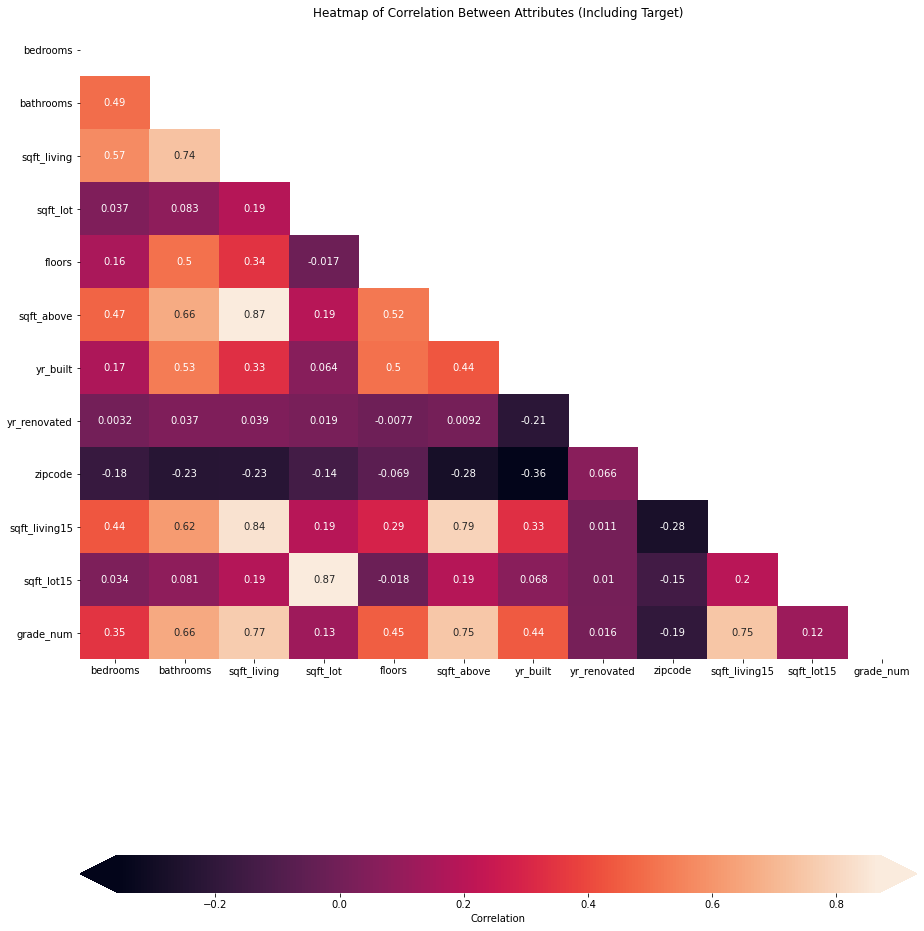

In [11]:
corr = X.corr()
fig, ax = plt.subplots(figsize=(15, 18))
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20386 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 20386 non-null  int64  
 1   date               20386 non-null  object 
 2   price              20386 non-null  float64
 3   bedrooms           20386 non-null  int64  
 4   bathrooms          20386 non-null  float64
 5   sqft_living        20386 non-null  int64  
 6   sqft_lot           20386 non-null  int64  
 7   floors             20386 non-null  float64
 8   waterfront         18140 non-null  object 
 9   view               20328 non-null  object 
 10  condition          20386 non-null  object 
 11  grade              20386 non-null  object 
 12  sqft_above         20386 non-null  int64  
 13  sqft_basement      20386 non-null  object 
 14  yr_built           20386 non-null  int64  
 15  yr_renovated       16783 non-null  float64
 16  zipcode            203

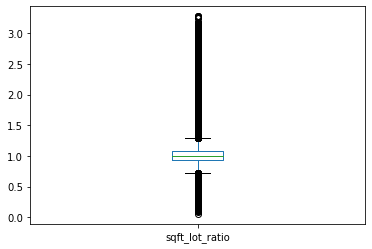

In [12]:
df.sqft_lot15.describe()
df['sqft_lot_ratio'] = df['sqft_lot'] / df['sqft_lot15']
df.sqft_lot_ratio.describe()
df.sqft_lot_ratio.plot.box()

df['sqft_lot_ratio'] = df.sqft_living / df.sqft_living15
df['sqft_lot_ratio'] = df['sqft_lot_ratio'].loc[(np.abs(stats.zscore(df.sqft_living_ratio)) < 2)]
df = df.dropna(subset = ['sqft_living_ratio'])
df.info()

ValueError: could not convert string to float: 'NO'